In [1]:
import os
import re
from PIL import Image, ImageChops, ImageEnhance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
def convert_to_ela_image(path, quality):
        filename = path
        resaved_filename = filename.split('.')[0] + '.resaved.jpg'
        im = Image.open(filename).convert('RGB')
        im.save(resaved_filename, 'JPEG', quality=quality)
        resaved_im = Image.open(resaved_filename)
        ela_im = ImageChops.difference(im, resaved_im)
        extrema = ela_im.getextrema()
        max_diff = max([ex[1] for ex in extrema])
        if max_diff == 0:
            max_diff = 1
        scale = 255.0 / max_diff

        ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
        return ela_im

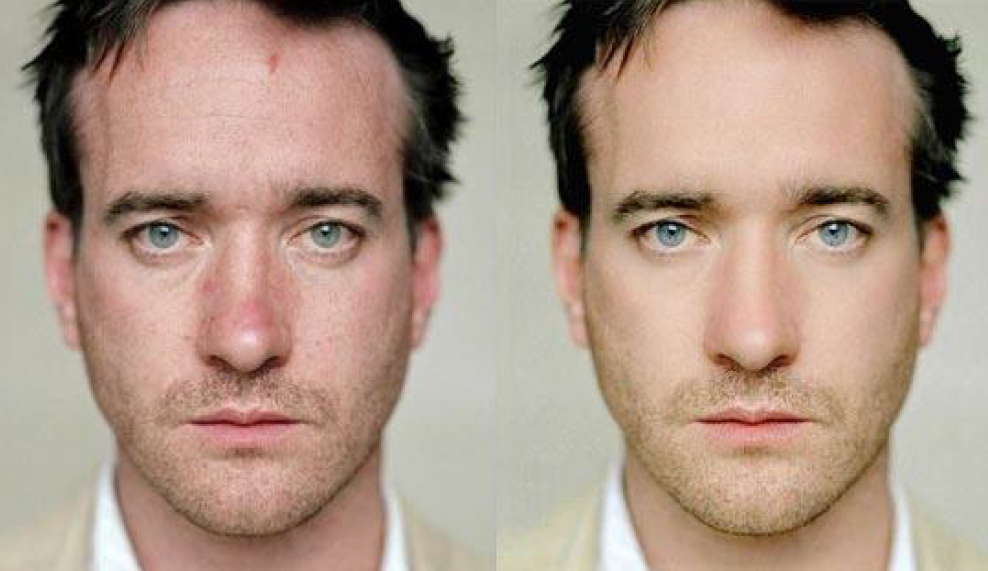

In [33]:
Image.open('datasets/train/sample2.png')

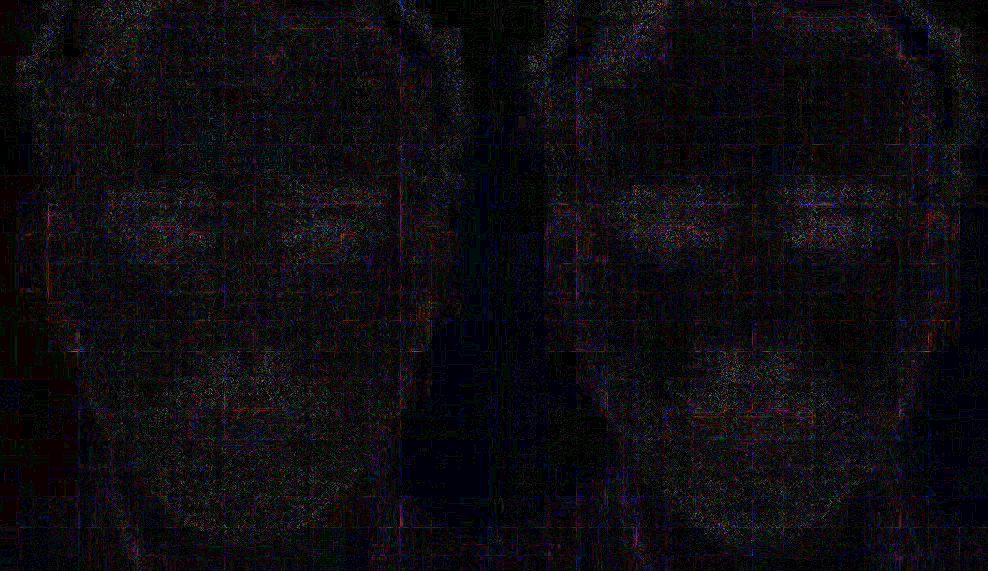

In [6]:
img = convert_to_ela_image('datasets/train/sample2.png', 90)
img